# Option 가격 결정 모형

    BS([underlyingPrice, strikePrice, interestRate, daysToExpiration], volatility=x, callPrice=y, putPrice=z)

    eg: 

    c = mibian.BS([1.4565, 1.45, 1, 30], volatility=20)
    c.callPrice	Returns the call price
    c.putPrice	Returns the put price
    c.callDelta	Returns the call delta
    c.putDelta	Returns the put delta
    c.callDelta2	Returns the call dual delta
    c.putDelta2	Returns the put dual delta
    c.callTheta	Returns the call theta
    c.putTheta	Returns the put theta
    c.callRho	Returns the call rho
    c.putRho	Returns the put rho
    c.vega	Returns the option vega
    c.gamma	Returns the option gamma


    c = mibian.BS([1.4565, 1.45, 1, 30], callPrice=0.0359)
    c.impliedVolatility	Returns the implied volatility from the call price


    c = mibian.BS([1.4565, 1.45, 1, 30], putPrice=0.0306)
    c.impliedVolatility	Returns the implied volatility from the put price


    c = mibian.BS([1.4565, 1.45, 1, 30], callPrice=0.0359, putPrice=0.0306)
    c.putCallParity	Returns the put-call parity

In [14]:
import os
import sys
sys.path.append(os.path.dirname(os.path.abspath(os.path.dirname('./'))))

from payoff import *

청솔주식회사의 주가는 현재 20,000 원이다. 이 주식의 콜옵션은 만기 6개월이고 행사가격은 21,000 원이다. 주식 연각 수익률의 표준편차는 0.8 이고, 무위험 이자율은 10% 이다.

블랙숄즈 모델에 의한 콜옵션의 현재 가치 계산

헤지비율은 얼마인가 ?

위의 콜옵션과 동일한 행사가격과 만기를 가진 풋옵션의 현재 가치는 ?

In [18]:
#BS([underlyingPrice, strikePrice, interestRate, daysToExpiration], volatility=x, 
#    callPrice=y, putPrice=z)

c = mibian.BS([20000, 21000, 10, 183], volatility=80)

In [21]:
C = c.callPrice
C

4470.4578970212115

In [22]:
# P = C - S + X e**-rT
C - 20000 + 21000 * np.exp(-0.1*0.5)

4446.275811536207

# 주식 옵션을 이용한 헷징

투자자 갑은 콜옵션 200 계약 (주식 2000 주에 대한 옵션)을 매도하였다. 콜옵션의 가격은 10,000 원, 주식 가격은 100,000 원, 콜옵션의 델타는 0.6 이다. 델타 헤징에 필요한 주식 수를 구하라.

$n_s + n_c\Delta_c = 0$

$n_c$ : 콜옵션의 매입 수량

$n_s$ : 주식 매입 수량

$\Delta_c$ : 콜옵션의 델타

In [3]:
0.6 * 2000

1200.0

현재 가지고 있는 주식 포트폴리오의 가치는 10 억원이며 KOSPI200 에 대한 포트폴리오의 베타($\beta_s$)는 2.0 이다. KOSPI200 콜옵션의 가격과 델타 값은 각각 5.00, 0.80 이고, 풋옵션의 가격과 델타 값은 3.00, -0.40 이다. 현재 KOSPI200 지수는 260.00 이며, KOSPI200 옵션의 거래 승수는 1 포인트 당 50만원이다.

(1) KOSPI200 콜옵션을 이용한 헤지전략 수립

(2) KOSPI200 풋옵션을 이용한 헤지전략 수립

$n_c = -\frac{\beta_s V_s}{I\Delta_c}$

$V_s$ : 주식포트폴리오의 가치

$I$ : 주가지수의 가치

$\Delta_c$ : call option 의 델타

$n_p = -\frac{\beta_s V_s}{I\Delta_p}$

In [12]:
n_c = -1 * (2.0 * 1000000000) / (260 * 500000 * 0.8)
print("포트폴리오의 헤지를 위한 콜옵션 계약수 = {:.2f}".format(n_c))

포트폴리오의 헤지를 위한 콜옵션 계약수 = -19.23


In [11]:
n_p = -1 * (2.0 * 1000000000) / (260 * 500000 * -0.4)
print("포트폴리오의 헤지를 위한 풋옵션 계약수 = {:.2f}".format(n_p))

포트폴리오의 헤지를 위한 풋옵션 계약수 = 38.46


Covered Call 손익

주식 매수가 : 260
콜옵션 매도 : 260


Text(0,0.5,'P & L')

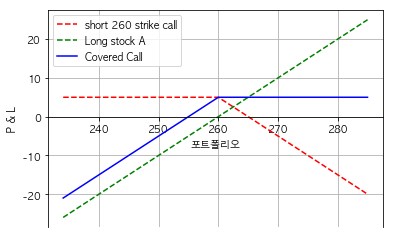

In [20]:
# 현재 KOSPI200
spot_price = 260

# 현재 KOSPI200 과 동일한 strike price (ATM) 콜옵션 매도 
strike_price_short_call = 260
premium_short_call = 5

print('Covered Call 손익\n')
print('주식 매수가 :', spot_price)
print('콜옵션 매도 :', strike_price_short_call)

# Stock price range at expiration of the call
sT = np.arange(0.9*spot_price,1.1*spot_price,1) 

payoff_short_call = short_call_payoff(sT, strike_price_short_call, premium_short_call)
payoff_stock_A = sT - spot_price
payoff_covered_call = payoff_short_call + payoff_stock_A

fig, ax = plt.subplots()
ax.spines['bottom'].set_position('zero')
ax.plot(sT, payoff_short_call, 'r--', 
        label="short "+str(strike_price_short_call)+" strike call")
ax.plot(sT, payoff_stock_A, 'g--', label='Long stock A')
ax.plot(sT, payoff_covered_call, 'b-', label='Covered Call')
plt.legend()
plt.grid(True)
plt.xlabel('포트폴리오')
plt.ylabel('P & L')

Protective Put 손익

주식 매수가 : 260
풋옵션 매수 : 260


Text(0,0.5,'P & L')

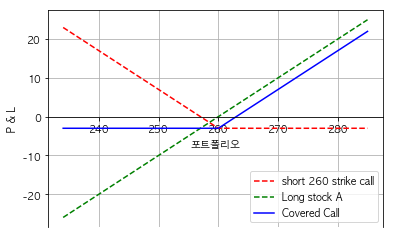

In [21]:
# 현재 KOSPI200
spot_price = 260

# 현재 KOSPI200 과 동일한 strike price (ATM) 콜옵션 매도 
strike_price_long_put = 260
premium_short_call = 3.0

print('Protective Put 손익\n')
print('주식 매수가 :', spot_price)
print('풋옵션 매수 :', strike_price_long_put)

# Stock price range at expiration of the call
sT = np.arange(0.9*spot_price,1.1*spot_price,1) 

payoff_short_call = long_put_payoff(sT, strike_price_short_call, premium_short_call)
payoff_stock_A = sT - spot_price
payoff_covered_call = payoff_short_call + payoff_stock_A

fig, ax = plt.subplots()
ax.spines['bottom'].set_position('zero')
ax.plot(sT, payoff_short_call, 'r--', 
        label="short "+str(strike_price_short_call)+" strike call")
ax.plot(sT, payoff_stock_A, 'g--', label='Long stock A')
ax.plot(sT, payoff_covered_call, 'b-', label='Covered Call')
plt.legend()
plt.grid(True)
plt.xlabel('포트폴리오')
plt.ylabel('P & L')